# 🫀 Predicting Heart Disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries. We will attempt to build a machine learning model that is capable of predicting if a patient has heart disease based on his/her medical attributes.

We are going to use the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not he/she has heart disease?

## 2. Data

The original data came from the Cleveland database from UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also an older version of the data available on Kaggle.
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept stage, we will proceed with the project.

## 4. Features

The following data dictionary lists different information about each of the features in the data.

1. age - age in years
2. sex - 1 = male; 0 = female
3. cp - chest pain type
    - 0 = Typical angina: chest pain related to decrease blood supply to the heart
    - 1 = Atypical angina: chest pain not related to heart
    - 2 = Non-anginal pain: typically esophageal spasms (non heart related)
    - 3 = Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    - serum = LDL + HDL + .2 * triglycerides
    - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl)
    - 1 = true; 0 = false
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    - 0 = Nothing to note
    - 1 = ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    - 2 = Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina
    - 1 = yes; 0 = no
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during exercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    - 0 = Upsloping: better heart rate with excercise (uncommon)
    - 1 = Flatsloping: minimal change (typical healthy heart)
    - 2 = Downsloping: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - 1, 3 = Normal
    - 6 = Fixed defect: used to be defect but ok now
    - 7 = Reversable defect: no proper blood movement when exercising
14. target - have disease or not (= the predicted attribute)
    - 1 = yes; 0 = no

## Preparing tools

We are going to use Pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Import all tools required

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For the plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Model exporting and importing
import joblib

## Loading data

In [2]:
df = pd.read_csv("heart-disease-bi-data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# View the number of rows and columns in the DataFrame
df.shape

(303, 14)

## Exploring data

The goal is to find out more about the data and become a subject matter expert on the dataset at hand.

1. What question(s) are we trying to solve?
2. What kind of data do we have?
3. How are different types of data treated?
4. What is missing from the data?
5. How do we deal with missing data?
6. Where are the outliers and why should we care about them?
7. How do we add, change or remove features to get the most out of the data?

In [4]:
# View the first five rows of the DataFrame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# View the last 5 rows of the DataFrame
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Find out how many examples there are in each target class
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

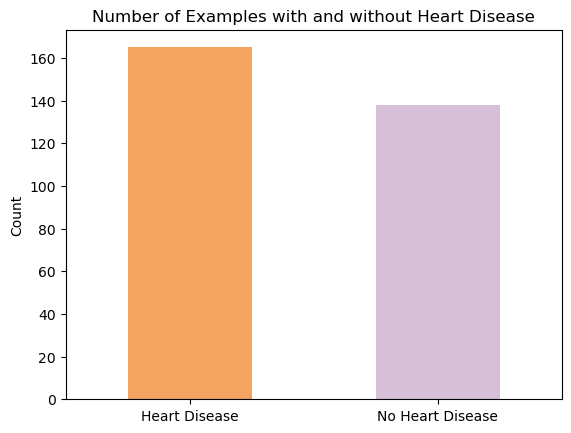

In [7]:
# To visualise the number of examples for each target class
df_visual = df.copy()
df_visual["target"] = df_visual["target"].map({0: "No Heart Disease", 1: "Heart Disease"})
df_visual["target"].value_counts().plot(kind = "bar",
                                        color = ["sandybrown", "thistle"],
                                        rot = 360)
plt.title("Number of Examples with and without Heart Disease")
plt.ylabel("Count");

In [8]:
# See different information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Determine if there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# Explore descriptive statistics about numerical values in the columns
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [11]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


Since there are nearly 100 female patients (sex = 0), 75% of them have a positive value of heart disease being present (target = 1). And when the example is a male (sex = 1), 44.9% indicates there is heart disease.

Hence, based on our existing dataset:
- If a participant is a woman, there is a 75% chance that she would have heart disease.
- If the participant is a man, we might predict that he would have heart disease almost half the time.
- Averaging these out, we could infer that close to 60% that a random patient would have heart disease.

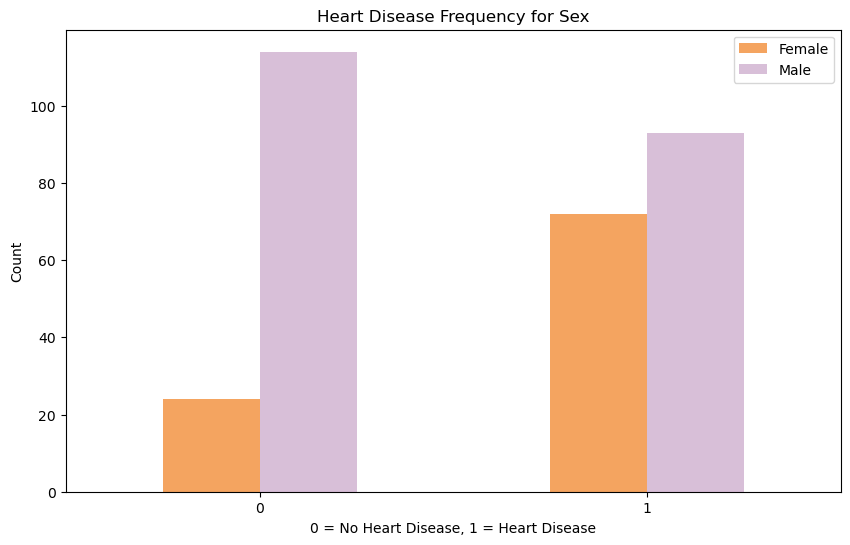

In [13]:
# Create a plot of crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind = "bar",
                                          figsize = (10, 6),
                                          color = ["sandybrown", "thistle"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0);

### Heart Disease Frequency according to Age vs Max Heart Rate

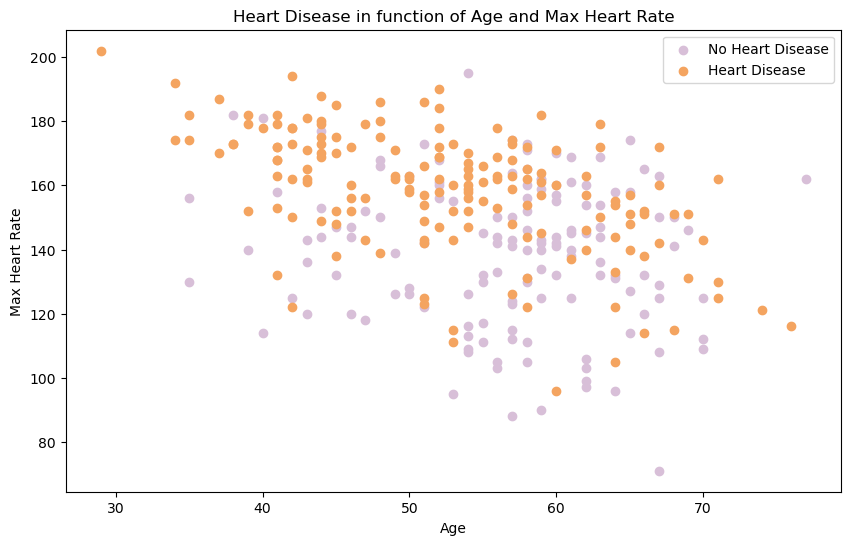

In [14]:
# Create another figure
plt.figure(figsize = (10, 6))

# Plot a scatter with negative examples
plt.scatter(df["age"][df["target"] == 0],
            df["thalach"][df["target"] == 0],
            c = "thistle")

# Plot a scatter with positive examples
plt.scatter(df["age"][df["target"] == 1],
            df["thalach"][df["target"] == 1],
            c = "sandybrown")

# Add more information to the scatterplot
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["No Heart Disease", "Heart Disease"]);

The scatterplot shows that there is a general downward trend of the max heart rate reducing as a patient's age increases, whether or not the patient has heart disease.

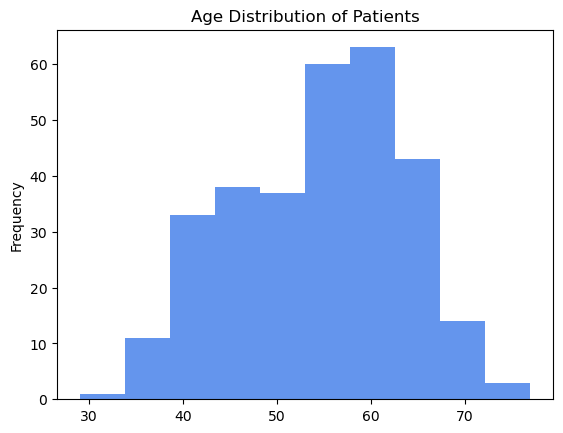

In [15]:
# Check the age distribution using a histogram
df["age"].plot.hist(color = "cornflowerblue",
                    title = "Age Distribution of Patients");

### Heart Disease Frequency according to Chest Pain Type

In [16]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


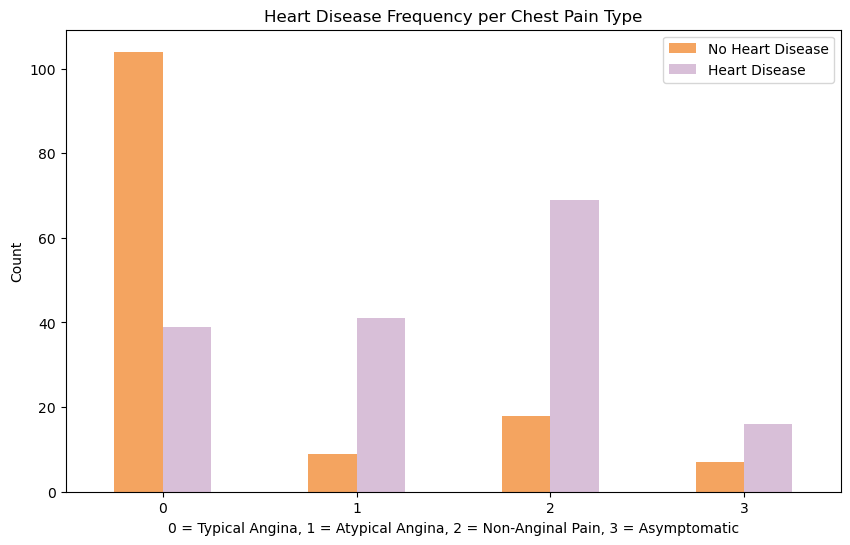

In [17]:
# Make the crosstab more visual
pd.crosstab(df["cp"], df["target"]).plot(kind = "bar",
                                         figsize = (10, 6),
                                         color = ["sandybrown", "thistle"]);

# Add more information about the visual
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation = 0);

The bar chart shows that patients with heart disease also experienced non-anginal pain (cp = 2), which is typically esophageal and non-heart related. We could check with heart specialists on the significance of this pattern. 

### Heart Disease Frequency according to Resting ECG

In [18]:
pd.crosstab(df["restecg"], df["target"])

target,0,1
restecg,,
0,79,68
1,56,96
2,3,1


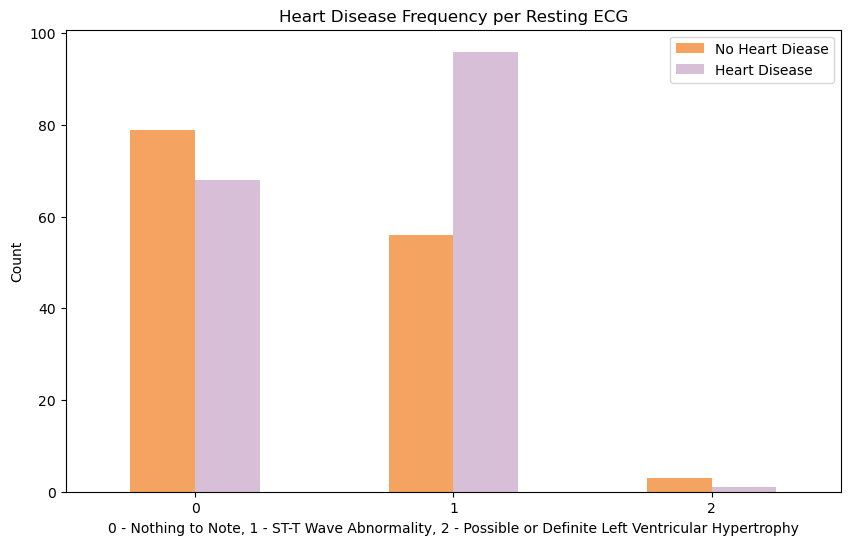

In [19]:
# Make the crosstab more visual
pd.crosstab(df["restecg"], df["target"]).plot(kind = "bar",
                                              figsize = (10, 6),
                                              color = ["sandybrown", "thistle"])

# Add more information about the visual
plt.title("Heart Disease Frequency per Resting ECG")
plt.xlabel("0 - Nothing to Note, 1 - ST-T Wave Abnormality, 2 - Possible or Definite Left Ventricular Hypertrophy")
plt.ylabel("Count")
plt.legend(["No Heart Diease", "Heart Disease"])
plt.xticks(rotation = 0);

### Heart Disease Frequency according to Exercise Induced Angina

In [20]:
pd.crosstab(df["target"], df["exang"])

exang,0,1
target,,
0,62,76
1,142,23


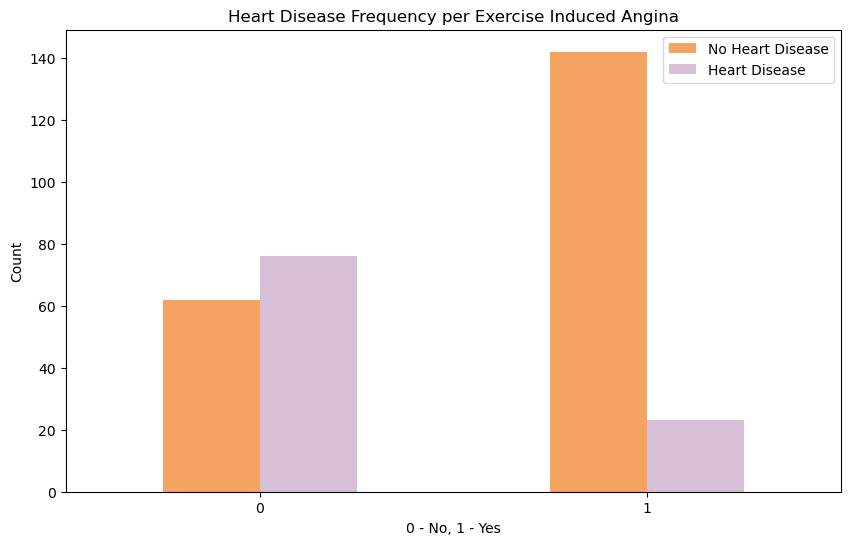

In [21]:
# Make the crosstab more visual
pd.crosstab(df["target"], df["exang"]).plot(kind = "bar",
                                            figsize = (10, 6),
                                            color = ["sandybrown", "thistle"])

# Add more information about the visual
plt.title("Heart Disease Frequency per Exercise Induced Angina")
plt.xlabel("0 - No, 1 - Yes")
plt.ylabel("Count")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation = 0);

In [22]:
# Create a correlation matrix of relationships between independent variables
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


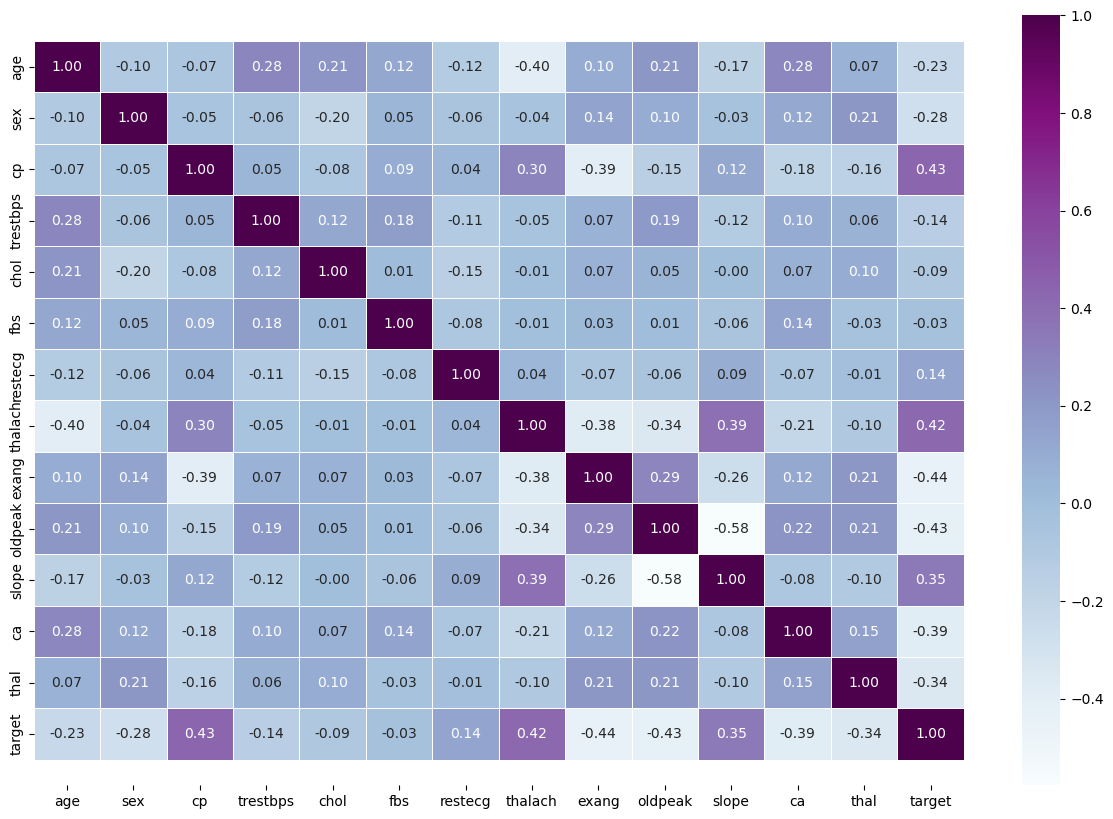

In [23]:
# Make the correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "BuPu")

# Adjust y-axis limitations for older versions of matplotlib
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

From the heatmap, we see the following potential relationships of features with more significant interactions among each other:

- Target vs Chest Pain Type has a positive correlation of 0.43 - even though the Heart Disease (target value = 1) value tapers off as the chest pain type value increases, it is observed that the ratio between Heart Disease (target value = 1) and No Heart Disease (target value = 0) is still much higher at the highest chest pain type value.
- Target vs Resting ECG has a positive correlation of 0.14 - the ratio between Heart Disease and No Heart Disease is significantly larger for ST-T Wave Abnormality (resting ECG value = 1), but it is also at its lowest when the resting ECG value is the highest, which  explains the significantly lesser inclined relationship with the higher target value.
- Target vs Exercise Induced Angina has a negative correlation of 0.44 - the exang value drops as the target value goes up, which means patients that experience angina (exang value = 1) during exercises have a lower chance of having heart disease.

## Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# Split data into X and y
X = df.drop("target", axis = 1)
y = df["target"]

In [26]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [28]:
# Reproduce test results
np.random.seed(42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [29]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [30]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now that the data has been split into training and test sets, it is time to build a machine learning model.

We will train it to find patterns on the training set and test it, based on the patterns found, on the test set.

The four different machine learning models that we are going to try on our classification problem are:

1. Linear SVC
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier
4. Logistic Regression - although not in the standard mapping for classification problems, it is implemented as a linear model for classification rather than regression in terms of the scikit-learn/ML nomenclature (taken from Scikit-Learn's documentation)
 
Model selection was done with the aid of Scikit-Learn's Machine Learning Map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [31]:
# Put models in a dictionary
models = {"Linear SVC": LinearSVC(dual = False, max_iter = 100000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression(max_iter = 1000)
         }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dictionary of different Scikit-Learn machine learning models.
    X_train: training data less labels
    X_test: testing data less labels
    y_train: training labels
    y_test: test labels
    """
    
    # Ensure results are reproducible
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through each model
    for name, model in models.items():
        # To fit the model to the data
        model.fit(X_train, y_train)
        # To evaluate the model and append its score to model_scores dictionary
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [32]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

{'Linear SVC': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Logistic Regression': 0.8852459016393442}

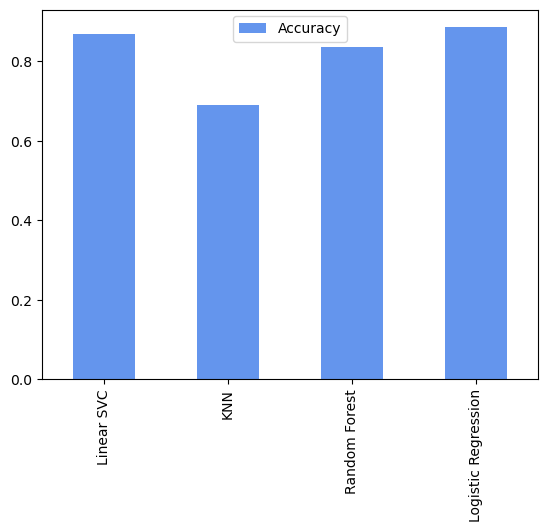

In [33]:
# Visually compare the models based on Accuracy as the evaluation metric
model_compare = pd.DataFrame(model_scores,
                             index = ["Accuracy"])
model_compare.T.plot.bar(color = "cornflowerblue");

Now that we have the baseline version of each model, and we know that a model's first predictions are not always what we should rely on moving forward, we will next look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning by hand 

We will manually tune the hyperparameters of the baseline version of our KNNClassifier(), which was the worst performing model.

In [34]:
# Tune the KNN model
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbours = range(1, 21)

# Setup KNN model instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbours:
    knn.set_params(n_neighbors = i)
    # Fit the model
    knn.fit(X_train, y_train)
    # Update the list of training scores
    train_scores.append(knn.score(X_train, y_train))
    # Update the list of test scores
    test_scores.append(knn.score(X_test, y_test));

In [35]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [36]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


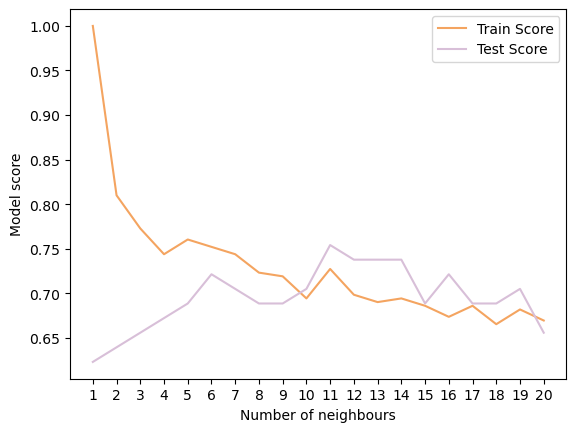

In [37]:
# Visualise the train and test scores after tuning of hyperparameters for the KNN model

plt.plot(neighbours, train_scores, label = "Train Score", color = "sandybrown")
plt.plot(neighbours, test_scores, label = "Test Score", color = "thistle")
plt.xlabel("Number of neighbours")
plt.ylabel("Model score")
plt.xticks(np.arange(1, 21, 1))
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores) * 100 :.2f}%")

After carrying out hyperparameter tuning by adjusting the default n_neighbor value of 5, we attained the highest score for our test set when the n_neighbor parameter is at 11.

We therefore managed to improve the KNN Classifier's result of the test score to 75.41% from the initial score of 68.85%. However, this improved score is still far below the baseline test scores achieved for the Linear SVC, Random Forest Classifer and Logistic Regresion models.

Based on this, we will discard KNN Clasifier.

### Hyperparameter tuning with RandomizedSearchCV

We will be tuning:

* LinearSVC()
* RandomForestClassifier()
* LogisticRegression()

using RandomizedSearchCV

In [38]:
# Create a hyperparameter grid for LinearSVC
lin_svc_grid = {"penalty": ["l1", "l2"],
                "C": [0.1, 1, 10],
                "class_weight": ["balanced"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_features": ["sqrt", "log2"],
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"penalty": ["l2"],
                "C": np.logspace(-4, 4, 20),
                "solver": ["newton-cg", "liblinear"]}

Now that the hyperparameter grids have been set up for our models, we will tune them using RandomizedSearchCV, starting with LinearSVC().

In [39]:
# Tune LinearSVC

np.random.seed(42)

# Ignore warnings related to Liblinear failing to converge - max_iter has been increased to 100000
# but the traceback error is expected to persist due to the small dataset used for this project

import warnings
warnings.filterwarnings("ignore")

# Set up random hyperparameter search for LinearSVC
rs_lin_svc = RandomizedSearchCV(LinearSVC(),
                                param_distributions = lin_svc_grid,
                                cv = 5,
                                n_iter = 30,
                                verbose = True)

# Fit random hyperparameter search model for LinearSVC
rs_lin_svc.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5, estimator=LinearSVC(), n_iter=30,
                   param_distributions={'C': [0.1, 1, 10],
                                        'class_weight': ['balanced'],
                                        'penalty': ['l1', 'l2']},
                   verbose=True)

In [40]:
# Find the best hyperparameters
rs_lin_svc.best_params_

{'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.1}

In [41]:
# Evaluate the randomised search model for LinearSVC
rs_lin_svc.score(X_test, y_test)

0.8688524590163934

We will do the same for RandomForestClassifier().

In [42]:
# Tune RandomForestClassifier

np.random.seed(42)

# Set up random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 50,
                           verbose = True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_features': 'log2',
 'max_depth': 10}

In [44]:
# Evaluate the randomised search model for RandomForestClassifier
rs_rf.score(X_test, y_test)

0.8688524590163934

Next, we will tune LogisticRegression().

In [45]:
# Tune LogisticRegression

np.random.seed(42)

# Set up random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'liblinear']},
                   verbose=True)

In [46]:
# Find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [47]:
# Evaluate the randomised search model for LogisticRegression
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [48]:
model_scores

{'Linear SVC': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918,
 'Logistic Regression': 0.8852459016393442}

Comparing the scores achieved between the baseline models and the randomised search models, we notice the following:

- Scores for LinearSVC() and LogisticRegression() are exactly the same at 0.8688524590163934 and 0.8852459016393442 respectively.
- The randomised search models for LinearSVC() and RandomForestClassifier() have attained the same score of 0.8688524590163934.

In order to minimise the time spent between experiments, we will push on with our LogisticRegression model.

### Hyperparameter tuning using GridSearchCV

Since our LogisticRegression model provides the best scores so far, we will try improving it again using GridSearchCV.

In [49]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Set up grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [50]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [51]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

The baseline, randomised search and grid search models of LogisticRegression() have attained the same score of 0.8852459016393442, which shows that our LogisticRegression model has performed very well.

This is rather impressive since Scikit-Learn's Machine Learning Map does not suggest LogisticRegression() to be a model for classification problems.

## Evaluating our tuned machine learning classifier beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1 score
* Cross-validation

To make comparisons and evaluate our trained model, we first need to make predictions.

In [52]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [53]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [54]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### ROC curve and AUC metric

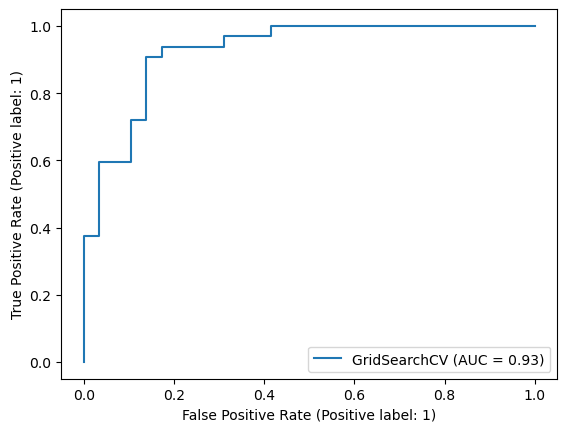

In [55]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(estimator = gs_log_reg, 
                               X = X_test,
                               y = y_test);

The ROC curve shows that our model is edging very close to being perfect with an AUC score of 0.93. Its performance is thus relatively not bad considering that it is a model that came out of the box.

### Confusion matrix

In [56]:
# Create a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = y_preds))

[[25  4]
 [ 3 29]]


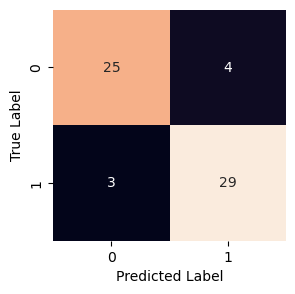

In [57]:
# Create a function for visualising the confusion matrix
def plot_conf_mat(y_test, y_preds):
    """
    Plots a visually pleasing confusion matrix using Seaborn's heatmap.
    """
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    # If needed, uncomment both lines of code to adjust y-axis limitations
    # for older versions of matplotlib
    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Our model predicts wrong labels in a relatively similar manner across both classes. 

Both false positive and false negative occurrences are what we would want to avoid as predicting that a patient has heart disease but actually does not (false positive - 4 labels) is just as bad as predicting a patient has no heart disease when he/she actually does (false negative - 3 labels).

### Classification report and cross-validated precision, recall and F1 score

In [58]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



As the above metrics were calculated based on one train and test split, we will recalculate these same metrics, namely accuracy, precision, recall and F1-score, using cross-validation so as to make our model evaluation more robust.

To do so, we will be using `cross_val_score()`.

In [59]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [60]:
# Create a new classifier with best hyperparameters found
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear")

In [61]:
# Create a dictionary of scoring metrics
scoring_metrics_dict = {"Accuracy": "accuracy",
                        "Precision": "precision",
                        "Recall": "recall",
                        "F1-score": "f1"}

# Create a function that calculates the cross-validated metrics
def cal_cross_val_metric(clf, X, y, cv = 5, scoring = scoring_metrics_dict):
    """
    Evaluates the model using cross-validation and returns a dictionary of
    absolute values of the mean scores for classification models.
    clf = classifier with best hyperparameters
    X = features with no labels
    y = labels
    cv = cross-validation strategy
    scoring = a dictionary of scoring metrics
    """
    
    # Make a dictionary to calculate and keep metric scores
    scores_dict = cross_validate(clf, X, y, cv = 5, scoring = scoring_metrics_dict)
    
    # Calculate the mean score for ech metric
    return {metric: np.mean(scores) for metric, scores in scores_dict.items()}

cal_cross_val_metric(clf = clf,
                     X = X,
                     y = y)

{'fit_time': 0.0032484054565429686,
 'score_time': 0.005314397811889649,
 'test_Accuracy': 0.8479781420765027,
 'test_Precision': 0.8215873015873015,
 'test_Recall': 0.9272727272727274,
 'test_F1-score': 0.8705403543192143}

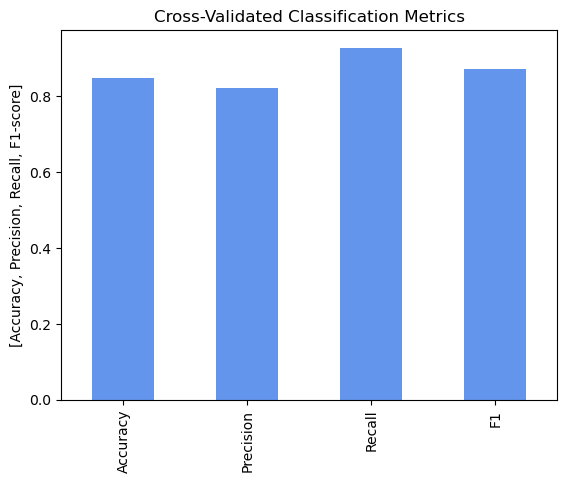

In [62]:
# Visualise cross-validated metrics
cv_metrics = pd.DataFrame(cal_cross_val_metric(clf = clf,
                                               X = X,
                                               y = y),
                          index = [0])

cv_metrics = cv_metrics[["test_Accuracy", "test_Precision", "test_Recall", "test_F1-score"]]
cv_metrics.rename(columns = {"test_Accuracy": "Accuracy",
                             "test_Precision": "Precision",
                             "test_Recall": "Recall",
                             "test_F1-score": "F1"},
                  inplace = True)

cv_metrics.T.plot.bar(title = "Cross-Validated Classification Metrics",
                      legend = False,
                      ylabel = ["Accuracy", "Precision", "Recall", "F1-score"],
                      color = "cornflowerblue");

## Feature importance

We will determine which features contributed most to the outcomes of our LogisticRegression model and how much they contributed to predicting the target.

In [63]:
# Fit an instance of LogisticRegression with the best hyperparameters

clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [64]:
# Check coefficients
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [66]:
# Map coefficients of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003167276981166473,
 'sex': -0.8604461876496617,
 'cp': 0.6606705956924419,
 'trestbps': -0.011569931456373254,
 'chol': -0.0016637425660326452,
 'fbs': 0.04386123481563001,
 'restecg': 0.3127581278180605,
 'thalach': 0.02459361121787892,
 'exang': -0.6041306062021752,
 'oldpeak': -0.5686283181242949,
 'slope': 0.4505162370067001,
 'ca': -0.6360987949046014,
 'thal': -0.6766338344936489}

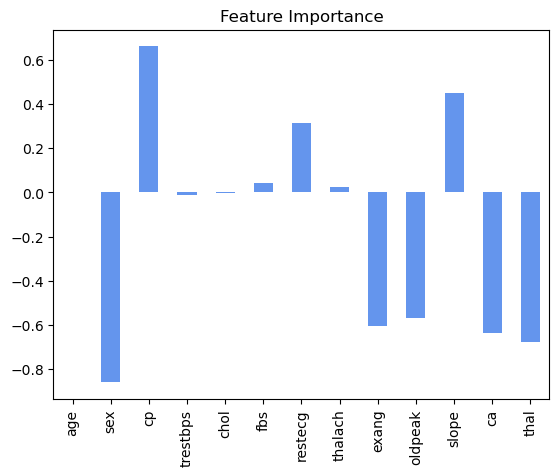

In [67]:
# Visualise feature importance
feature_df = pd.DataFrame(feature_dict,
                          index = [0])

feature_df.T.plot.bar(title = "Feature Importance",
                      legend = False,
                      color = "cornflowerblue");

Features with the highest positive and negative coefficients to the target variable are deemed to be relatively more important features. They would be:

* cp: 0.6606705956924419
* slope: 0.4505162370067001
* sex: -0.8604461876496617
* thal: -0.6766338344936489

We will next take a closer look at the respective pairings of each feature and target.

In [68]:
pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


cp has a strong positive coefficient whereby increases in the value of cp would result in the model becoming more incline to predict a higher value of target (i.e. 1). We see the ratio proportion gradually increasing from 2.67 : 1 (rounded down to 2 dp) when cp = 0 to 1 : 2.28 (rounded down to 2 dp) when cp = 3.

This is a considerably alarming trend as higher values of cp either represent chest pains not related to heart (cp = 1 and 2) or chest pains that do not show signs of disease (cp = 3).

In [69]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope has a strong positive coefficient, so the model is more likely to predict a higher value of target as the value of slope increases. Although it is worth noting that there are mixed relationships between slope and target, the ratio proportion is comparatively wider as the value of slope goes up (from 4 : 3 when slope = 0 to 1.85 : 1 (rounded down to 2 dp) when slope = 1 to 1 : 3.05 (rounded down to 2 dp) when slope = 2).

Based on the data dictionary, this makes sense with what the values of slope symbolise, i.e. better heart rate when exercising (slope = 0), typical healthy heart (slope = 1) and signs of unhealthy heart (slope = 2).

In [70]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


sex has a strong negative coefficient, which results in higher likelihood of the model predicting a lower value of target as the value of sex goes up. This is seen based on the proportion moving from a 1 : 3 ratio to an almost 1 : 1 ratio.

In [71]:
pd.crosstab(df["thal"], df["target"])

target,0,1
thal,,
0,1,1
1,12,6
2,36,130
3,89,28


thal has a strong negative coefficient by which increases in the thal value would result in the model being more likely to predict a lower target value. It is noted that although there seems to be both direct and inverse relationships between both variables, the ratio proportion grows comparatively wider as thal goes up (1 : 1 when thal = 0, 2 : 1 when thal = 1, 1 : 3.61 when thal = 2 and 3.17 : 1 (rounded down to 2 dp) when thal = 3).

## Conclusion

Even though we were unable to fulfil our evaluation criteria of hitting 95% accuracy, we managed to attain 88.52% from our LogisticRegression model with best hyperparameters (and 84.79% using our cross-validated model).

Despite falling short, we have managed to figure out what does not work well based on the current data available.

Possible steps to be taken next would be:

* Collect more patient samples by reaching out to medical experts
* Try better performing models such as CatBoost and XGBoost
* Improve the current model beyond what we have done thus far

## Exporting model

In [72]:
# Save best performing model to current working directory
joblib.dump(gs_log_reg, filename = "./model/gs_logistic_regression_model_1.joblib")

['./model/gs_logistic_regression_model_1.joblib']

## Loading model

In [73]:
# Load model from current working directory
loaded_gs_log_reg = joblib.load(filename = "./model/gs_logistic_regression_model_1.joblib")

loaded_gs_log_reg_score = loaded_gs_log_reg.score(X_test, y_test)
print(loaded_gs_log_reg_score)

0.8852459016393442
